In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
# configs
raw_data_path = '../02_data/raw/ml_project1_data.csv'
save_data_path = '../02_data/processed/00_pre_modeling_analysis.csv'

In [3]:
# Functions

# visualisation

def show_percentage_on_plot(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() + p.get_height()/80
        ax.annotate(percentage, (x, y), size = 12)
        
def show_number_on_plot(ax):
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height() + p.get_height()/80))

        
# calculated fields

def accepted_campaign(data):
    if (data['AcceptedCmp1'] == 1 | data['AcceptedCmp2'] == 1 | 
        data['AcceptedCmp3'] == 1 | data['AcceptedCmp4'] == 1 | data['AcceptedCmp5'] == 1):
    
        return 1
    
    else:
        
        return 0
    
def num_cmp_accepted(data):
    return (data['AcceptedCmp1'] + data['AcceptedCmp2'] + 
            data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'])

In [4]:
df = pd.read_csv(raw_data_path)

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# NA values
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [7]:
df[df['Income'] != df['Income']]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


In [8]:
# lets fill Na values with 0 to refer miss information
df.Income.fillna(0, inplace=True)

In [9]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [10]:
# Fixing datatypes
categorical_columns = ['Response',
                       'Complain',
                       'AcceptedCmp1',             
                       'AcceptedCmp2',             
                       'AcceptedCmp3',            
                       'AcceptedCmp4',             
                       'AcceptedCmp5',
                       'Education',
                       'Marital_Status']

for feature in categorical_columns:
    df[feature] = df[feature].astype('category')
    
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)

In [11]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                    category
Marital_Status               category
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                 category
AcceptedCmp4                 category
AcceptedCmp5                 category
AcceptedCmp1                 category
AcceptedCmp2                 category
Complain                     category
Z_CostContac

In [12]:
## Feature Engineering

# Creating age column: (year of birth) - (year of enrollment with the company)
df['YearOfEnrollment'] = df.Dt_Customer.apply(lambda x: int(x.year))
df['Age'] = df['YearOfEnrollment'] - df['Year_Birth']
df['YearsOfEnrollment'] = 2014 - df['YearOfEnrollment']

# Removing non relevant features
df.drop(['ID', 'YearOfEnrollment',
        'Z_CostContact', # only one value
        'Z_Revenue'], # only one value
        axis = 1,
        inplace = True)

df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,YearsOfEnrollment
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,1,55,2
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,0,60,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,0,48,1
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,0,30,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,0,33,0


In [13]:
orderned_cols = ['Dt_Customer', 'YearsOfEnrollment','Age', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 
                 'Teenhome', 'Recency', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases','NumWebPurchases',                 
                 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
                 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                 'Complain', 'Response']

In [14]:
len(orderned_cols) == len (df.columns)

True

In [15]:
df = df[orderned_cols]
df.head()

,Dt_Customer,YearsOfEnrollment,Age,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,Income,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,2012-09-04,2,55,1957,Graduation,Single,0,0,58,58138.0,...,10,4,7,0,0,0,0,0,0,1
1,2014-03-08,0,60,1954,Graduation,Single,1,1,38,46344.0,...,1,2,5,0,0,0,0,0,0,0
2,2013-08-21,1,48,1965,Graduation,Together,0,0,26,71613.0,...,2,10,4,0,0,0,0,0,0,0
3,2014-02-10,0,30,1984,Graduation,Together,1,0,26,26646.0,...,0,4,6,0,0,0,0,0,0,0
4,2014-01-19,0,33,1981,PhD,Married,1,0,94,58293.0,...,3,6,5,0,0,0,0,0,0,0


In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsOfEnrollment,2240.0,0.971875,0.684554,0.0,1.00,1.0,1.00,2.0
Age,2240.0,44.222321,12.022855,16.0,36.00,43.0,54.00,121.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
Income,2240.0,51687.459375,25609.342730,0.0,34722.00,51075.0,68289.75,666666.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0


In [17]:
# Error? let's suppose that there are century-old technological people
df[df['Age'] >= 100]

,Dt_Customer,YearsOfEnrollment,Age,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,Income,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
192,2013-09-26,1,113,1900,2n Cycle,Divorced,1,0,99,36640.0,...,1,2,5,0,0,0,0,0,1,0
239,2014-05-17,0,121,1893,2n Cycle,Single,0,1,23,60182.0,...,0,2,4,0,0,0,0,0,0,0
339,2013-09-26,1,114,1899,PhD,Together,0,0,36,83532.0,...,6,4,1,0,0,0,0,1,0,0


In [18]:
df.nunique()

Dt_Customer             663
YearsOfEnrollment         3
Age                      61
Year_Birth               59
Education                 5
Marital_Status            8
Kidhome                   3
Teenhome                  3
Recency                 100
Income                 1975
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp1              2
AcceptedCmp2              2
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
Complain                  2
Response                  2
dtype: int64

In [19]:
df.drop('Year_Birth', axis=1, inplace=True)

In [20]:
# Starting to understand what make customer accept the last campaign

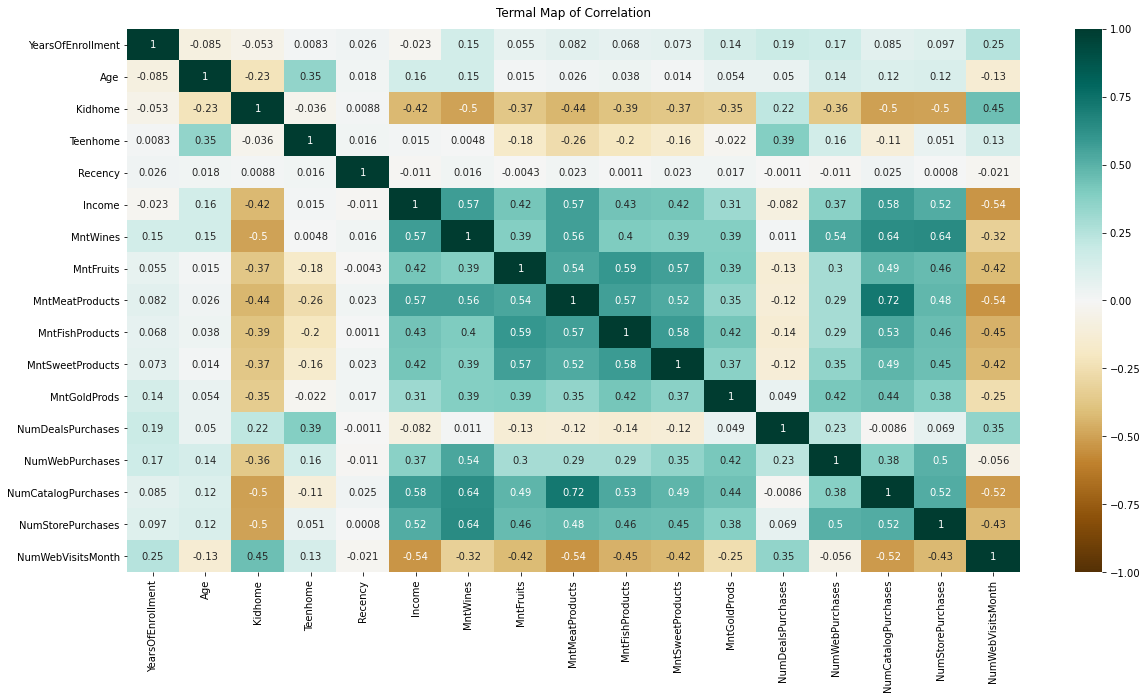

In [21]:
# Correlation
df_corr = df.corr()

plt.figure(figsize = (20,10))
corplot = sns.heatmap(df_corr, vmin = -1, vmax = 1, annot = True, cmap='BrBG')
corplot.set_title('Termal Map of Correlation', 
                  fontdict={'fontsize':12}, 
                  pad=12);

nothing strange here, some non-obvious correlations, such as the higher the income, the lower the number of visits to the site, but nothing too critical

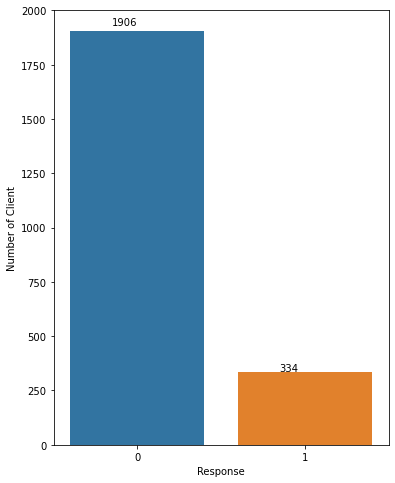

In [22]:
# Count plots 
plt.figure(1, figsize = (6, 8))
ax = sns.countplot(x = 'Response', data = df)
plt.ylabel('Number of Client')

show_number_on_plot(ax)
    
plt.show()

In [23]:
df['accepted_cmp_before'] = df.apply(accepted_campaign, axis=1)
df['qtd_cmp_accepted'] = df.apply(num_cmp_accepted, axis=1)

In [24]:
df_positive = df[df['Response'] == 1]
df_negative = df[df['Response'] == 0]

In [25]:
print(df_positive.shape, df_negative.shape)

(334, 29) (1906, 29)


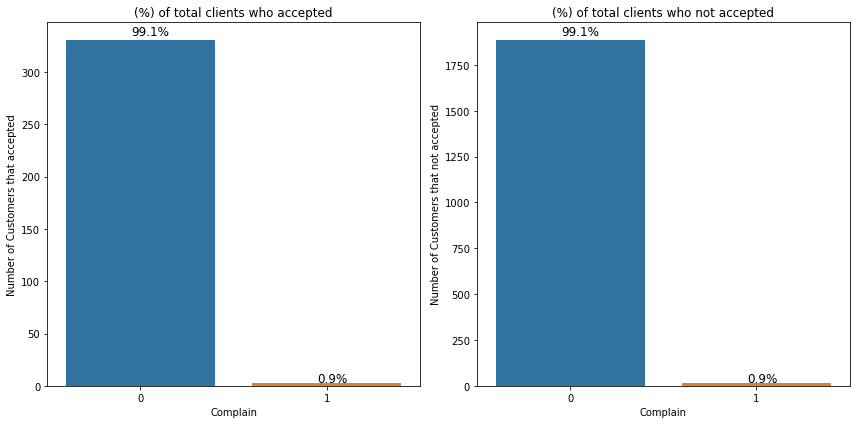

In [26]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.subplot(1,2,1)
ax = sns.countplot(x = 'Complain', data = df_positive)
plt.ylabel('Number of Customers that accepted')
plt.title('(%) of total clients who accepted')

show_percentage_on_plot(ax, df_positive.Complain)

plt.subplot(1,2,2)
ax = sns.countplot(x = 'Complain', data = df_negative)
plt.ylabel('Number of Customers that not accepted')
plt.title('(%) of total clients who not accepted')

show_percentage_on_plot(ax, df_negative.Complain)

fig.tight_layout()
plt.show()

similar behavior, nothing enlightening

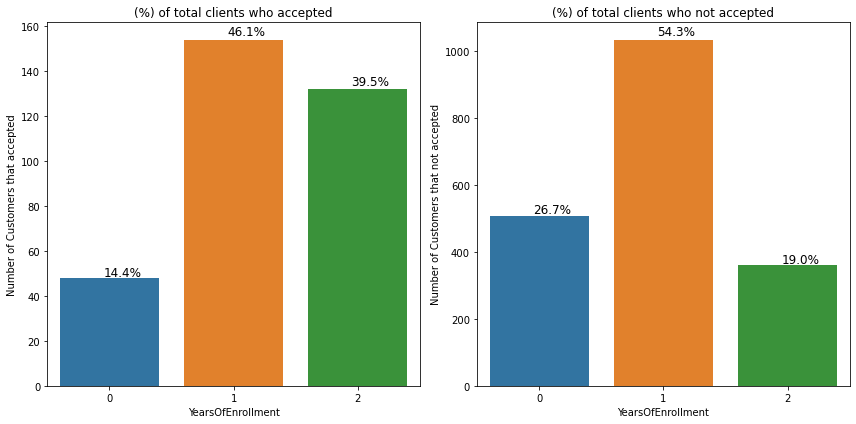

In [27]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.subplot(1,2,1)
ax = sns.countplot(x = 'YearsOfEnrollment', data = df_positive)
plt.ylabel('Number of Customers that accepted')
plt.title('(%) of total clients who accepted')

show_percentage_on_plot(ax, df_positive.YearsOfEnrollment)

plt.subplot(1,2,2)
ax = sns.countplot(x = 'YearsOfEnrollment', data = df_negative)
plt.ylabel('Number of Customers that not accepted')
plt.title('(%) of total clients who not accepted')

show_percentage_on_plot(ax, df_negative.YearsOfEnrollment)

fig.tight_layout()
plt.show()

Older customers seem to be more accepting of the new campaign

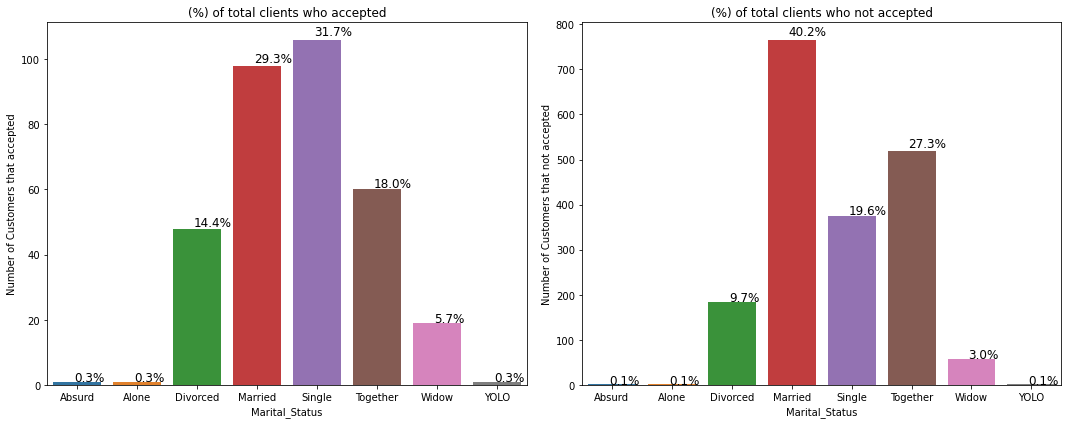

In [28]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(15)

plt.subplot(1,2,1)
ax = sns.countplot(x = 'Marital_Status', data = df_positive)
plt.ylabel('Number of Customers that accepted')
plt.title('(%) of total clients who accepted')

show_percentage_on_plot(ax, df_positive.Marital_Status)

plt.subplot(1,2,2)
ax = sns.countplot(x = 'Marital_Status', data = df_negative)
plt.ylabel('Number of Customers that not accepted')
plt.title('(%) of total clients who not accepted')

show_percentage_on_plot(ax, df_negative.Marital_Status)

fig.tight_layout()
plt.show()

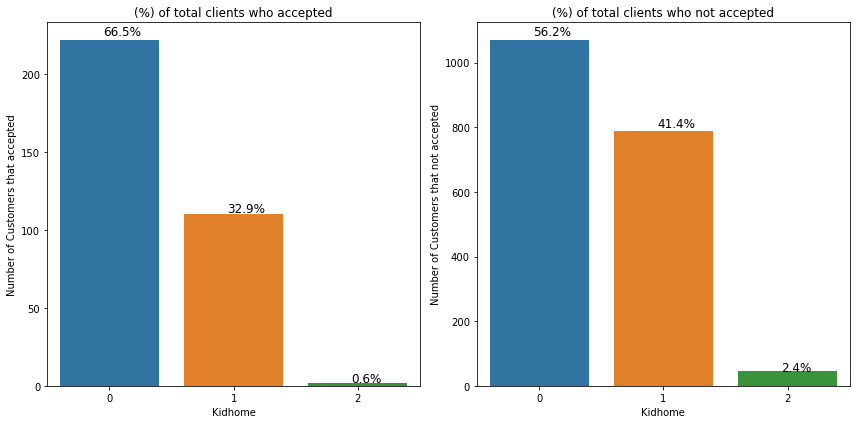

In [29]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.subplot(1,2,1)
ax = sns.countplot(x = 'Kidhome', data = df_positive)
plt.ylabel('Number of Customers that accepted')
plt.title('(%) of total clients who accepted')

show_percentage_on_plot(ax, df_positive.Kidhome)

plt.subplot(1,2,2)
ax = sns.countplot(x = 'Kidhome', data = df_negative)
plt.ylabel('Number of Customers that not accepted')
plt.title('(%) of total clients who not accepted')

show_percentage_on_plot(ax, df_negative.Kidhome)

fig.tight_layout()
plt.show()

similar behavior

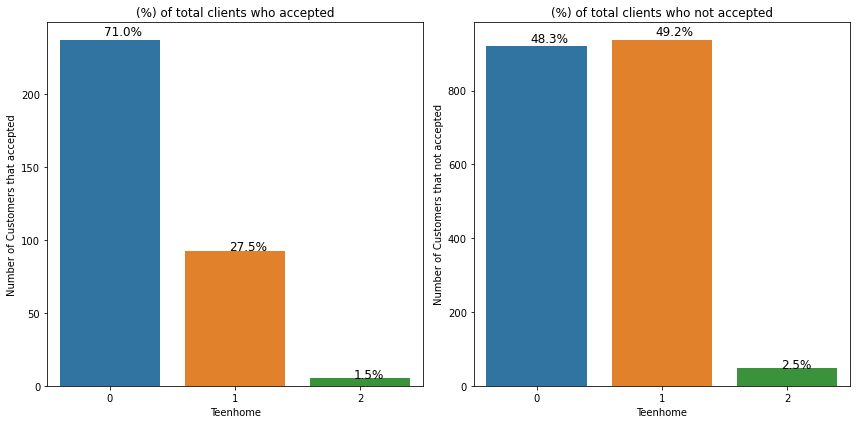

In [30]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.subplot(1,2,1)
ax = sns.countplot(x = 'Teenhome', data = df_positive)
plt.ylabel('Number of Customers that accepted')
plt.title('(%) of total clients who accepted')

show_percentage_on_plot(ax, df_positive.Teenhome)

plt.subplot(1,2,2)
ax = sns.countplot(x = 'Teenhome', data = df_negative)
plt.ylabel('Number of Customers that not accepted')
plt.title('(%) of total clients who not accepted')

show_percentage_on_plot(ax, df_negative.Teenhome)

fig.tight_layout()
plt.show()

clients without teenagers at home tend to be more accepting of the campaign

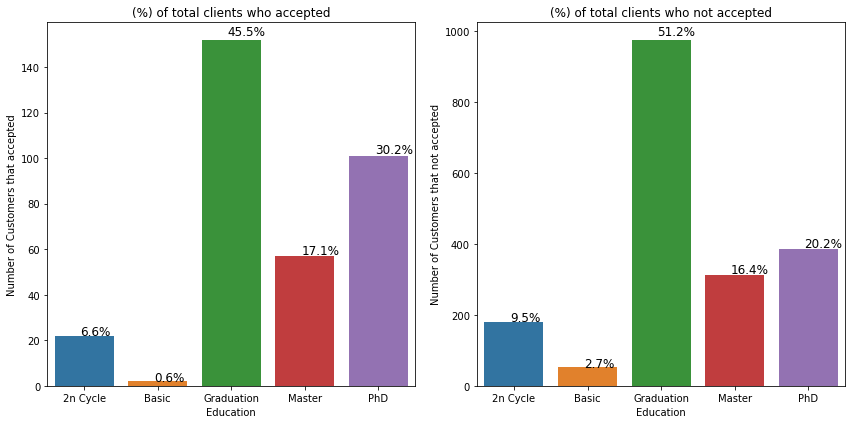

In [31]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.subplot(1,2,1)
ax = sns.countplot(x = 'Education', data = df_positive)
plt.ylabel('Number of Customers that accepted')
plt.title('(%) of total clients who accepted')

show_percentage_on_plot(ax, df_positive.Education)

plt.subplot(1,2,2)
ax = sns.countplot(x = 'Education', data = df_negative)
plt.ylabel('Number of Customers that not accepted')
plt.title('(%) of total clients who not accepted')

show_percentage_on_plot(ax, df_negative.Education)

fig.tight_layout()
plt.show()

similar behavior, but it seems that customers with higher academic degrees are more accepting of the latest campaign

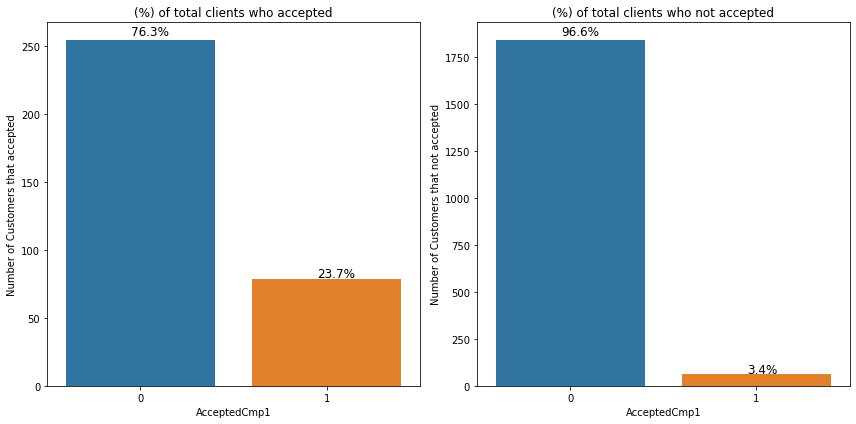

In [32]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.subplot(1,2,1)
ax = sns.countplot(x = 'AcceptedCmp1', data = df_positive)
plt.ylabel('Number of Customers that accepted')
plt.title('(%) of total clients who accepted')

show_percentage_on_plot(ax, df_positive.AcceptedCmp1)

plt.subplot(1,2,2)
ax = sns.countplot(x = 'AcceptedCmp1', data = df_negative)
plt.ylabel('Number of Customers that not accepted')
plt.title('(%) of total clients who not accepted')

show_percentage_on_plot(ax, df_negative.AcceptedCmp1)

fig.tight_layout()
plt.show()

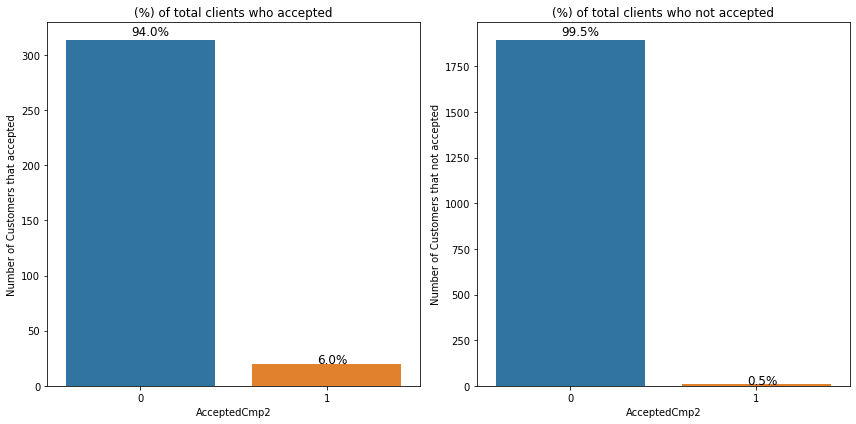

In [33]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.subplot(1,2,1)
ax = sns.countplot(x = 'AcceptedCmp2', data = df_positive)
plt.ylabel('Number of Customers that accepted')
plt.title('(%) of total clients who accepted')

show_percentage_on_plot(ax, df_positive.AcceptedCmp2)

plt.subplot(1,2,2)
ax = sns.countplot(x = 'AcceptedCmp2', data = df_negative)
plt.ylabel('Number of Customers that not accepted')
plt.title('(%) of total clients who not accepted')

show_percentage_on_plot(ax, df_negative.AcceptedCmp2)

fig.tight_layout()
plt.show()

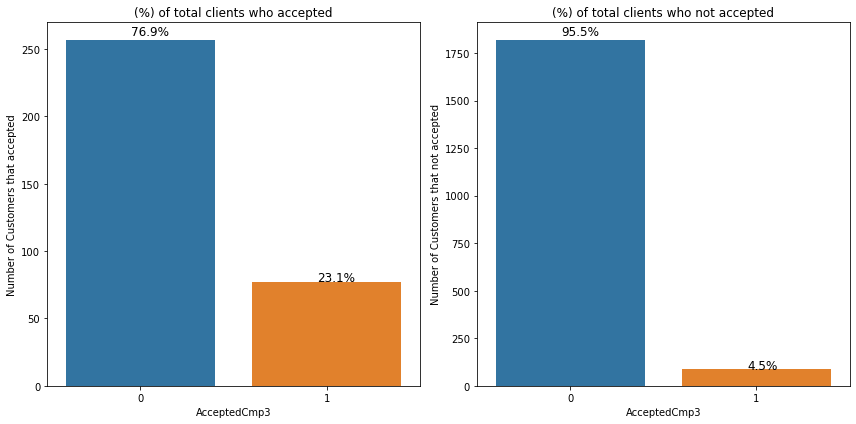

In [34]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.subplot(1,2,1)
ax = sns.countplot(x = 'AcceptedCmp3', data = df_positive)
plt.ylabel('Number of Customers that accepted')
plt.title('(%) of total clients who accepted')

show_percentage_on_plot(ax, df_positive.AcceptedCmp3)

plt.subplot(1,2,2)
ax = sns.countplot(x = 'AcceptedCmp3', data = df_negative)
plt.ylabel('Number of Customers that not accepted')
plt.title('(%) of total clients who not accepted')

show_percentage_on_plot(ax, df_negative.AcceptedCmp3)

fig.tight_layout()
plt.show()

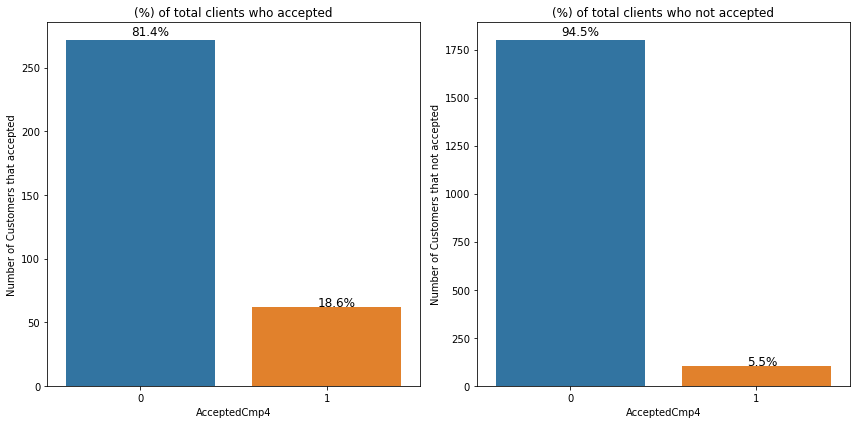

In [35]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.subplot(1,2,1)
ax = sns.countplot(x = 'AcceptedCmp4', data = df_positive)
plt.ylabel('Number of Customers that accepted')
plt.title('(%) of total clients who accepted')

show_percentage_on_plot(ax, df_positive.AcceptedCmp4)

plt.subplot(1,2,2)
ax = sns.countplot(x = 'AcceptedCmp4', data = df_negative)
plt.ylabel('Number of Customers that not accepted')
plt.title('(%) of total clients who not accepted')

show_percentage_on_plot(ax, df_negative.AcceptedCmp4)

fig.tight_layout()
plt.show()

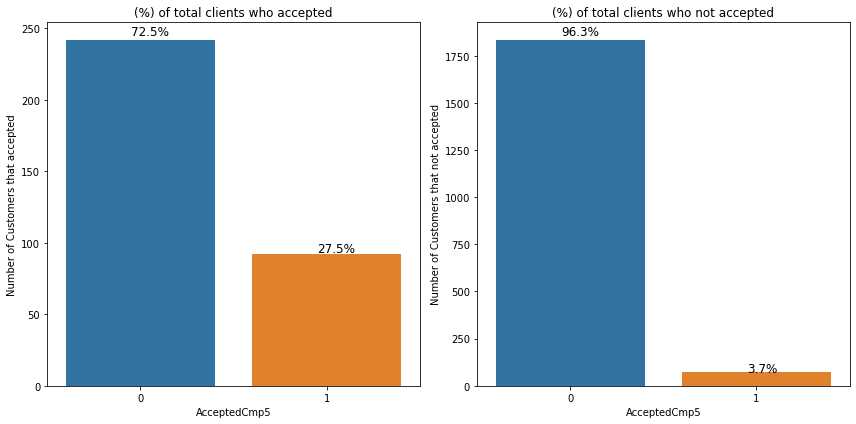

In [36]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.subplot(1,2,1)
ax = sns.countplot(x = 'AcceptedCmp5', data = df_positive)
plt.ylabel('Number of Customers that accepted')
plt.title('(%) of total clients who accepted')

show_percentage_on_plot(ax, df_positive.AcceptedCmp5)

plt.subplot(1,2,2)
ax = sns.countplot(x = 'AcceptedCmp5', data = df_negative)
plt.ylabel('Number of Customers that not accepted')
plt.title('(%) of total clients who not accepted')

show_percentage_on_plot(ax, df_negative.AcceptedCmp5)

fig.tight_layout()
plt.show()

In general, it seems that if a customer has already accepted a campaign before, he is more likely to accept the new campaign

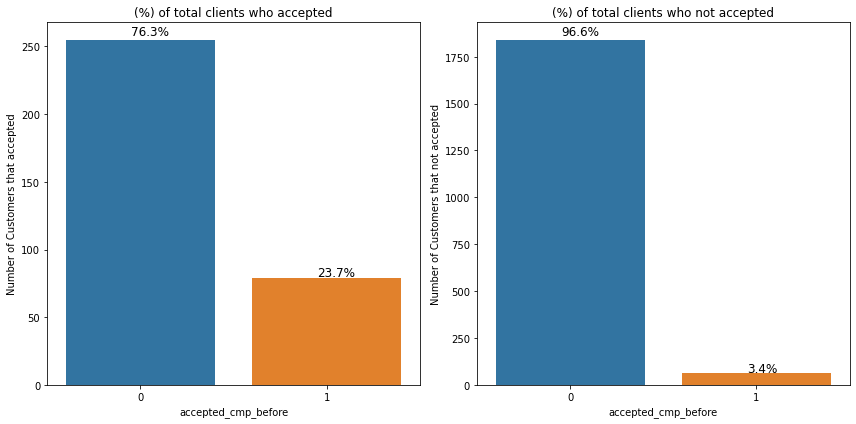

In [37]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.subplot(1,2,1)
ax = sns.countplot(x = 'accepted_cmp_before', data = df_positive)
plt.ylabel('Number of Customers that accepted')
plt.title('(%) of total clients who accepted')

show_percentage_on_plot(ax, df_positive.accepted_cmp_before)

plt.subplot(1,2,2)
ax = sns.countplot(x = 'accepted_cmp_before', data = df_negative)
plt.ylabel('Number of Customers that not accepted')
plt.title('(%) of total clients who not accepted')

show_percentage_on_plot(ax, df_negative.accepted_cmp_before)

fig.tight_layout()
plt.show()

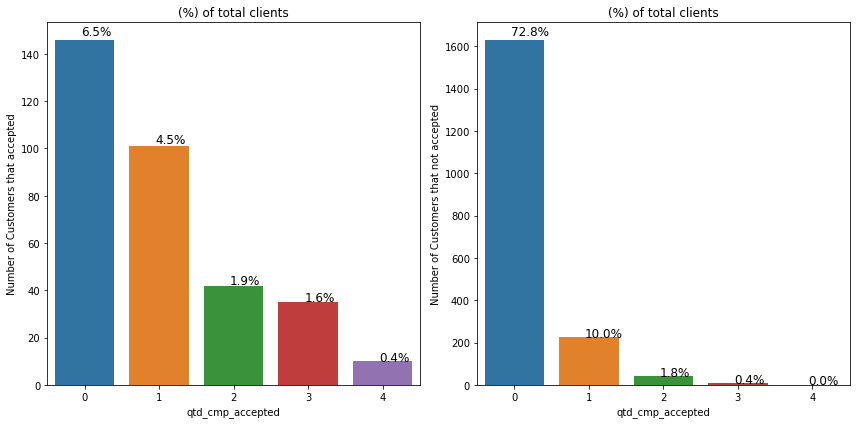

In [38]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.subplot(1,2,1)
ax = sns.countplot(x = 'qtd_cmp_accepted', data = df_positive)
plt.ylabel('Number of Customers that accepted')
plt.title('(%) of total clients')

show_percentage_on_plot(ax, df.qtd_cmp_accepted)

plt.subplot(1,2,2)
ax = sns.countplot(x = 'qtd_cmp_accepted', data = df_negative)
plt.ylabel('Number of Customers that not accepted')
plt.title('(%) of total clients')

show_percentage_on_plot(ax, df.qtd_cmp_accepted)

fig.tight_layout()
plt.show()

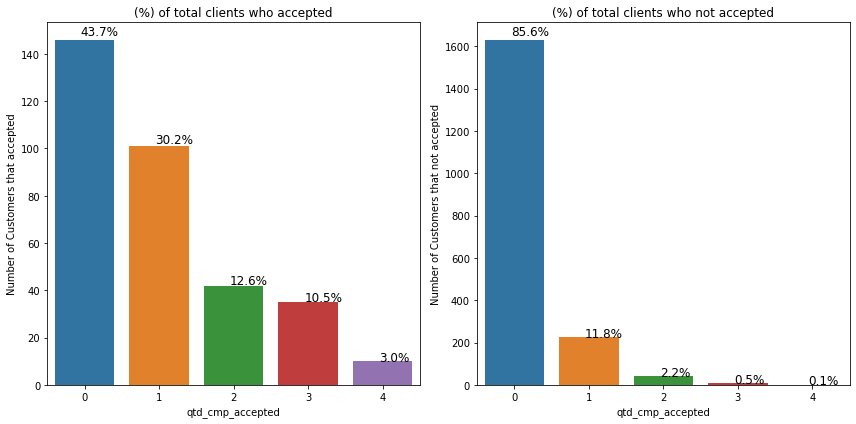

In [39]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.subplot(1,2,1)
ax = sns.countplot(x = 'qtd_cmp_accepted', data = df_positive)
plt.ylabel('Number of Customers that accepted')
plt.title('(%) of total clients who accepted')

show_percentage_on_plot(ax, df_positive.qtd_cmp_accepted)

plt.subplot(1,2,2)
ax = sns.countplot(x = 'qtd_cmp_accepted', data = df_negative)
plt.ylabel('Number of Customers that not accepted')
plt.title('(%) of total clients who not accepted')

show_percentage_on_plot(ax, df_negative.qtd_cmp_accepted)

fig.tight_layout()
plt.show()

we can see that if the client has not accepted any campaign before, the chance of him not accepting the last campaign increases and the more campaigns he accepted, the greater the chance of him accepting the last campaign

In [40]:
df.to_csv(save_data_path, index=False)